We first try to install the required libraries for this homework. The libraries are [worldcloud](https://github.com/amueller/word_cloud) and [gensim](https://radimrehurek.com/gensim/index.html).

In [1]:
from os import path
from collections import Counter
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
%matplotlib inline

In [2]:
# Read the csv file
print('Reading csv file...')
df = pd.read_csv(path.join('hillary-clinton-emails', 'emails.csv'))
print('is done!')

Reading csv file...
is done!


In the following, we consider `RawText` column for analyzing words frequency. As it is asked, we pass the raw text to find the most frequent words.

(-0.5, 399.5, 199.5, -0.5)

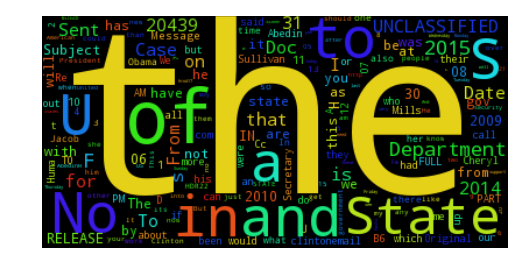

In [3]:
raw_text = ' '.join(df['RawText'].tolist())
# Tokenize the text
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
token_text = tokenizer.tokenize(raw_text)
# Count the number of occurance of most common words in the text
result = Counter(token_text).most_common()
# Plot the word cloud
wordcloud = WordCloud().generate_from_frequencies(result)
plt.imshow(wordcloud)
plt.axis("off")

As we can see, there are so many common words (i.e. articles, prepositions, etc.) in the above picture. In order to have better insight about the most frequent words, we clean the raw text which consider following factors:
- We convert all words to the lower case words.
- We remove all short words; i.e., all words having less than 3 characters.
- We remove all numbers. It seems that this numbers are occurred because the raw text contains the data. So we decide to remove them.

**Note** that This part requires to download stopwords corpus from NLTK. It is necessary to run nltk.download() in python and then download the required package. Further informations are
available [here](http://stackoverflow.com/questions/9953619/technique-to-remove-common-wordsand-their-plural-versions-from-a-string).

In [4]:
def clean_text(text):
    # Convert all words to lower case
    text = text.lower()
    # Tokenize the text while removing all words with less than 3 characters
    # i.e. removing short words
    tokenizer = nltk.tokenize.RegexpTokenizer(r'[a-z]{4,}')
    token_text = tokenizer.tokenize(text)
    # Remove common words from the text
    s = set(nltk.corpus.stopwords.words('english'))
    token_text = list(filter(lambda x: x not in s, set(token_text)))
    return token_text

Also, we need to get rid of characters showing newline which are different for different OS. The difference is explained [here](http://stackoverflow.com/questions/15433188/r-n-r-n-what-is-the-difference-between-them). We repalce this characters with space for the `ExtractedBodyText` column.

(-0.5, 399.5, 199.5, -0.5)

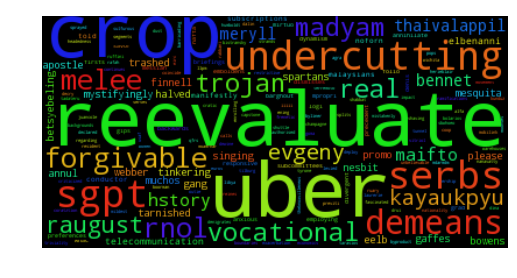

In [5]:
token_clean_text = clean_text(raw_text)
# Count the number of occurance of most common words in the text
result_clean = Counter(token_clean_text).most_common()
# Plot the word cloud
wordcloud_clean = WordCloud().generate_from_frequencies(result_clean)
plt.imshow(wordcloud_clean)
plt.axis("off")